# Analyze Efficiency and accuracy  on Cluster



The chunks are all on the sample axis. The shape of the data coming into the PCA is `(n_sample, 132651)`.

Information about the nodes (hive) can be found here:

https://docs.pace.gatech.edu/hive/resources/


## Conclusions

???

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from toolz.curried import map as fmap
from toolz.curried import curry

# 8 core 

In [4]:
data = pd.read_csv("job5_shuffled_fullsvd/pace-eightnode.csv",index_col=False)

In [5]:
data

,chunks,samples,fit_time,predict_time,r_squared
0,2,2000,70.975,22.451,0.962
1,2,4000,140.165,44.721,0.964
2,2,6000,221.482,70.240,0.968
3,2,8000,308.793,97.425,0.848
4,2,2000,71.547,22.126,0.939
...,...,...,...,...,...
59,48,8000,95.938,28.552,0.953
60,48,2000,25.763,8.340,0.954
61,48,4000,49.370,15.706,0.887
62,48,6000,73.276,23.713,0.971


In [6]:
data2000 = data.loc[data.samples == 2000].groupby('chunks').min()
data4000 = data.loc[data.samples == 4000].groupby('chunks').min()
data6000 = data.loc[data.samples == 6000].groupby('chunks').min()
data8000 = data.loc[data.samples == 8000].groupby('chunks').min()

In [7]:
data2000

,samples,fit_time,predict_time,r_squared
chunks,,,,
2,2000,70.975,22.126,0.939
4,2000,38.374,11.715,0.893
8,2000,23.512,7.083,0.944
16,2000,24.222,7.693,0.969
24,2000,24.655,7.736,0.965
32,2000,25.531,8.515,0.809
40,2000,26.434,8.247,0.830
48,2000,25.763,8.316,0.953


In [8]:
data2000.index

Int64Index([2, 4, 8, 16, 24, 32, 40, 48], dtype='int64', name='chunks')

In [9]:
data2000.iloc[:,1]

chunks
2     70.975
4     38.374
8     23.512
16    24.222
24    24.655
32    25.531
40    26.434
48    25.763
Name: fit_time, dtype: float64

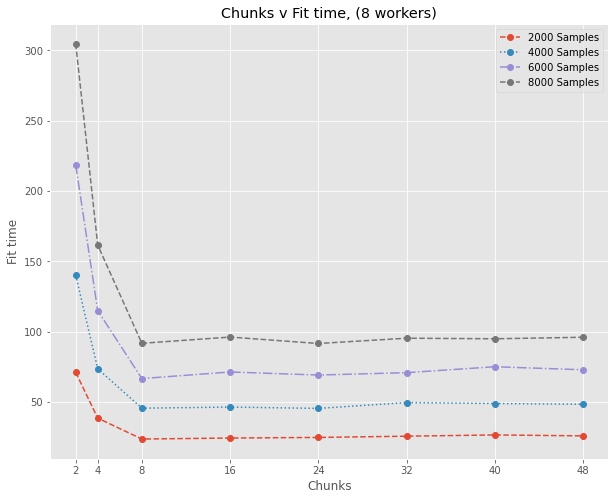

In [10]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000.index, data2000.iloc[:,1],'o--', label='2000 Samples')
plt.plot(data4000.index, data4000.iloc[:,1], 'o:', label='4000 Samples')
plt.plot(data6000.index, data6000.iloc[:,1], 'o-.', label='6000 Samples')
plt.plot(data8000.index, data8000.iloc[:,1], 'o--', label='8000 Samples')
plt.xticks(data2000.index)
plt.title('Chunks v Fit time, (8 workers)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

# 16 Core

In [12]:
data_16 = pd.read_csv("job6_shuffled_fullsvd/pace-sixteennode.csv",index_col=False)

data2000_16 = data_16.loc[data_16.samples == 2000].groupby('chunks').min()
data4000_16 = data_16.loc[data_16.samples == 4000].groupby('chunks').min()
data6000_16 = data_16.loc[data_16.samples == 6000].groupby('chunks').min()
data8000_16 = data_16.loc[data_16.samples == 8000].groupby('chunks').min()

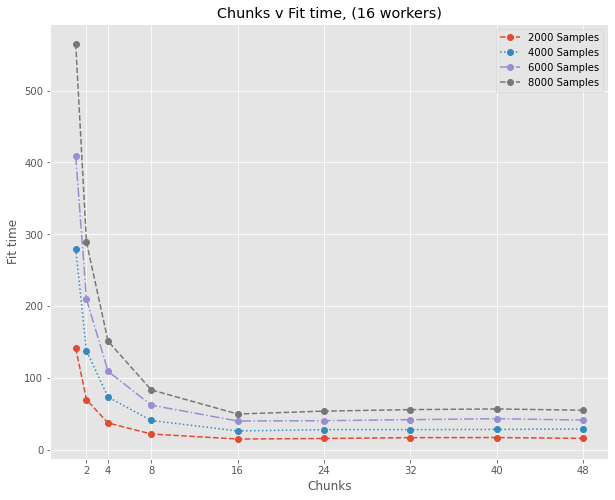

In [13]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000_16.index, data2000_16.iloc[:,1],'o--', label='2000 Samples')
plt.plot(data4000_16.index, data4000_16.iloc[:,1], 'o:', label='4000 Samples')
plt.plot(data6000_16.index, data6000_16.iloc[:,1], 'o-.', label='6000 Samples')
plt.plot(data8000_16.index, data8000_16.iloc[:,1], 'o--', label='8000 Samples')
plt.xticks(data2000.index)
plt.title('Chunks v Fit time, (16 workers)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

# 24 Core

In [14]:
data_24 = pd.read_csv("job7_shuffled_fullsvd/pace-twentyfournode.csv",index_col=False)

data2000_24 = data_24.loc[data_24.samples == 2000].groupby('chunks').min()
data4000_24 = data_24.loc[data_24.samples == 4000].groupby('chunks').min()
data6000_24 = data_24.loc[data_24.samples == 6000].groupby('chunks').min()
data8000_24 = data_24.loc[data_24.samples == 8000].groupby('chunks').min()

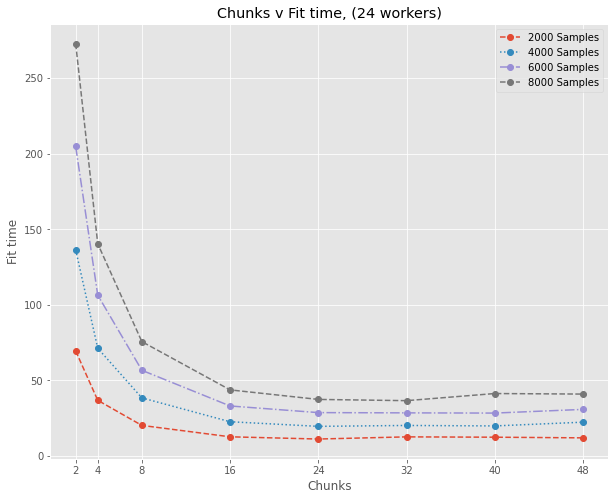

In [15]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000_24.index, data2000_24.iloc[:,1],'o--', label='2000 Samples')
plt.plot(data4000_24.index, data4000_24.iloc[:,1], 'o:', label='4000 Samples')
plt.plot(data6000_24.index, data6000_24.iloc[:,1], 'o-.', label='6000 Samples')
plt.plot(data8000_24.index, data8000_24.iloc[:,1], 'o--', label='8000 Samples')
plt.xticks(data2000.index)
plt.title('Chunks v Fit time, (24 workers)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

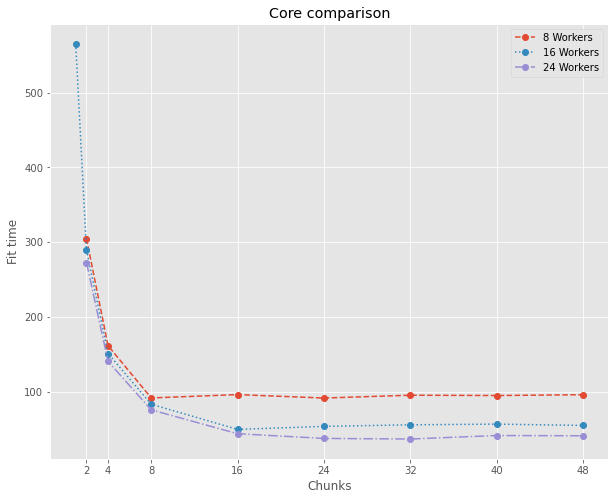

In [16]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data8000.index, data8000.iloc[:,1],'o--', label='8 Workers')
plt.plot(data8000_16.index, data8000_16.iloc[:,1], 'o:', label='16 Workers')
plt.plot(data8000_24.index, data8000_24.iloc[:,1], 'o-.', label='24 Workers')
plt.xticks(data2000.index)
plt.title('Core comparison')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

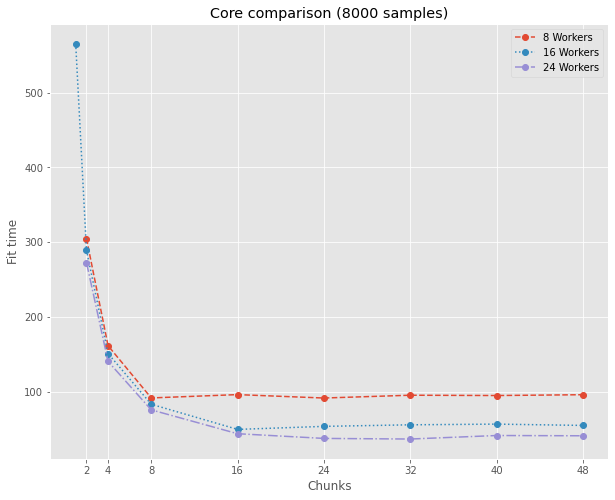

In [21]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data8000.index[:], data8000.iloc[:,1],'o--', label='8 Workers')
plt.plot(data8000_16.index[:], data8000_16.iloc[:,1], 'o:', label='16 Workers')
plt.plot(data8000_24.index[:], data8000_24.iloc[:,1], 'o-.', label='24 Workers')
plt.xticks(data2000.index[:])
plt.title('Core comparison (8000 samples)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

In [18]:
data8000.index[4:]

Int64Index([24, 32, 40, 48], dtype='int64', name='chunks')

# Accuracy 

In [19]:
data8000

,samples,fit_time,predict_time,r_squared
chunks,,,,
2,8000,304.829,97.425,0.848
4,8000,161.460,50.006,0.967
8,8000,91.624,28.248,0.810
16,8000,96.066,30.687,0.958
24,8000,91.498,29.037,0.931
32,8000,95.255,29.545,0.971
40,8000,94.846,31.076,0.945
48,8000,95.938,28.552,0.953


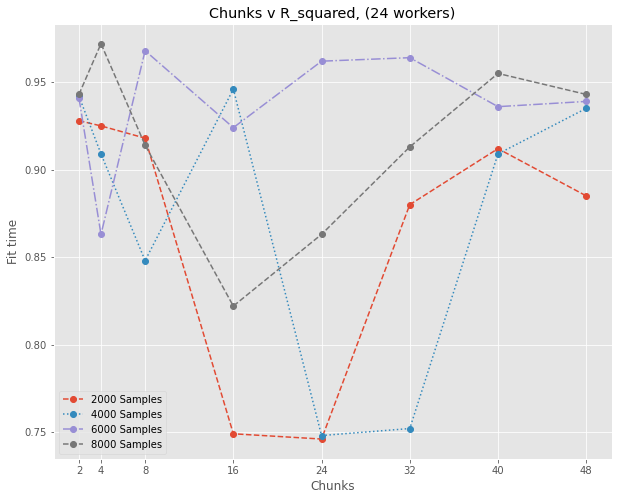

In [20]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000_24.index, data2000_24.iloc[:,3],'o--', label='2000 Samples')
plt.plot(data4000_24.index, data4000_24.iloc[:,3], 'o:', label='4000 Samples')
plt.plot(data6000_24.index, data6000_24.iloc[:,3], 'o-.', label='6000 Samples')
plt.plot(data8000_24.index, data8000_24.iloc[:,3], 'o--', label='8000 Samples')
plt.xticks(data2000.index)
plt.title('Chunks v R_squared, (24 workers)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()